# TP4 - Ondes, relation de dispersion

## ARGUELLO Camilo

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from IPython.display import display, Math

# Phase d'une onde

In [3]:
# Constants
v_0 = 40 # KHz

In [4]:
# distances
x = np.array([1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]) # cm
dt = np.array([1.6, 4, 7.6, 10.4, 13.2, 16, 18.4]) # \mu s
T = 25 * np.ones(len(x)) # ms
phi = 2 * np.pi * (dt / T)

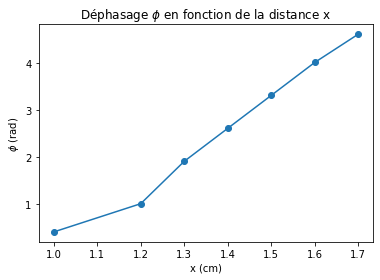

In [5]:
# phi en función de x
plt.plot(x, phi, 'o-')
plt.xlabel('x (cm)')
plt.ylabel('$\\phi$ (rad)')
plt.title('Déphasage $\\phi$ en fonction de la distance x')
plt.show()

Optimization terminated successfully.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

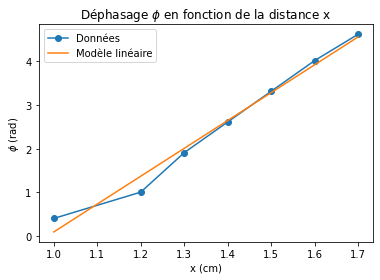

In [6]:
# ajuste lineal pour \phi = -kx + \phi_0

def f(x, k, phi0):
    return k * x + phi0
  
def chi2(params):
    k, phi0 = params
    return np.sum((f(x, k, phi0) - phi)**2)
  
res = minimize(chi2, [8, 0])
print(res.message)
k, phi0 = res.x

# affichage des résultats
display(Math('k = %.2f \; cm^{-1}' % k))
display(Math('\\phi_0 = %.2f \; rad' % phi0))

# longueur d'onde = (x1 - x2)
lamb = 2 * np.pi / k # cm
display(Math('\\lambda = %.2f \; cm' % lamb))

# affichage du fit
plt.plot(x, phi, 'o-', label='Données')
plt.plot(x, f(x, k, phi0), label='Modèle linéaire')
plt.xlabel('x (cm)')
plt.ylabel('$\\phi$ (rad)')
plt.title('Déphasage $\\phi$ en fonction de la distance x')
plt.legend()
plt.show()

### Relation de dispersion

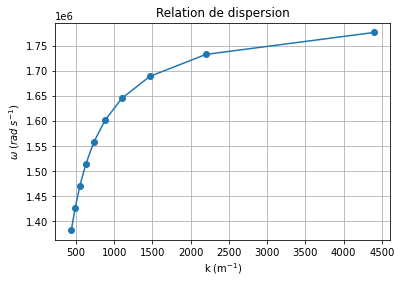

In [59]:
# mesures

# fréquences réparties sur un intervalle +- 5 KHz
v = np.linspace(v_0 - 5, v_0 + 5, 10) # KHz
d = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) # cm
N = 7 * np.ones(len(d)) # nombre des fois que les signaux sont en phase
lam = d / N # cm

k = 2 * np.pi / lam # cm^-1
k_m = k * 100 # m^-1
w = 2 * np.pi * v # KHz
w_Hz = w * 1e3 # Hz
w_rad_s = w_Hz * 2 * np.pi # rad/s

delta_k = 0.1 # cm^-1
delta_k_m = delta_k * 100 # m^-1

plt.errorbar(k_m, w_rad_s, xerr=delta_k_m, fmt='o-')
plt.xlabel('k (m$^{-1}$)')
plt.ylabel('$\\omega$ ($rad \; s^{-1}$)')
plt.title('Relation de dispersion')
plt.grid()
plt.show()

In [63]:
# Valeur c à partir du graphe
# Vitesse c = w / k
c_test = w_Hz / k_m # m/s
display(Math('c = %.2f \; m \; s^{-1}' % np.mean(c_test)))

<IPython.core.display.Math object>

In [66]:
# Valeur c avec ajustement
# Courbe fit w = c k

def f(x, c):
    return c * x

def chi2(params):
    c = params[0]
    return np.sum((f(k_m, c) - w_Hz)**2)
  
# minimise
res = minimize(chi2, [1])
print(res.message)
c = res.x[0]
display(Math('c = %.2f \; m \; s^{-1}' % c))

Optimization terminated successfully.


<IPython.core.display.Math object>

### B.4 Mesure de la relation de dispersion

,v (Hz),k (m^-1),w (rad/s),delta v (Hz),delta k (m^-1),delta w (rad/s)
0,15.0,502.654825,94.247780,0.1,4.021239,78.520814
1,20.0,502.654825,125.663706,0.1,4.021239,94.846051
2,25.0,502.654825,157.079633,0.1,4.021239,112.404060
3,30.0,502.654825,188.495559,0.1,4.021239,130.698954
4,35.0,502.654825,219.911486,0.1,4.021239,149.460378
5,40.0,502.654825,251.327412,0.1,4.021239,168.532599
6,45.0,502.654825,282.743339,0.1,4.021239,187.820962
7,50.0,502.654825,314.159265,0.1,4.021239,207.265132


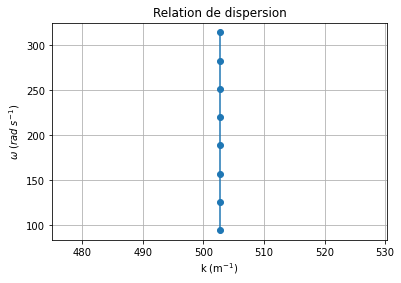

In [95]:
# Frequences allant de 15 à 50 Hz par pas de 5 Hz
v = np.linspace(15, 50, 8) # Hz
delta_v = 0.1 # Hz

# longueur d'onde
lam = (1.25 / 100) * np.ones(len(v)) # m
delta_lam = 0.01 / 100 # m

# vitesse
c = lam * v # m/s
delta_c = v * np.sqrt((delta_lam / lam)**2 + (delta_v / v)**2)

k = 2 * np.pi / lam # m^-1
delta_k = 2 * np.pi * delta_lam / lam**2 # m^-1

w = k * c # rad/s
delta_w = np.sqrt((delta_k / k)**2 + (delta_c / c)**2) * w

# Create a data frame with the data
data_obj = {
    'v (Hz)': v,
    'k (m^-1)': k,
    'w (rad/s)': w,
    'delta v (Hz)': delta_v,
    'delta k (m^-1)': delta_k,
    'delta w (rad/s)': delta_w
}

df = pd.DataFrame(data_obj)
display(df)

plt.plot(k, w, 'o-')
plt.xlabel('k (m$^{-1}$)')
plt.ylabel('$\\omega$ ($rad \; s^{-1}$)')
plt.title('Relation de dispersion')
plt.grid()
plt.show()
